___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [6]:
!python --version

Python 3.9.12


In [7]:
#!pip install tensorflow

In [55]:
!python --version

Python 3.9.12


In [9]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [13]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [14]:
df.head()

price  feature1  feature2
0 461.528   999.788   999.766
1 548.130   998.862  1001.042
2 410.297  1000.070   998.844
3 540.382   999.952  1000.441
4 546.025  1000.446  1000.339

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [16]:
# 2 label ve 1 tane target var. 

In [17]:
df.describe().T

count     mean    std     min     25%      50%      75%      max
price    1000.000  498.673 93.785 223.347 433.026  502.382  564.922  774.408
feature1 1000.000 1000.014  0.974 997.058 999.332 1000.010 1000.638 1003.208
feature2 1000.000  999.980  0.948 996.996 999.316 1000.002 1000.645 1002.666

In [18]:
## DL te data distribution cok onemli

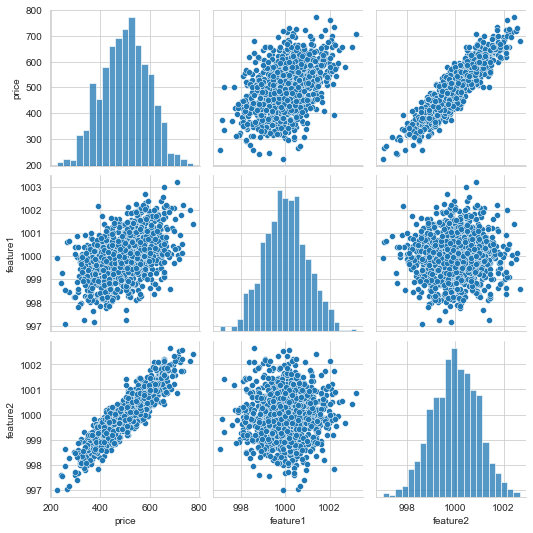

In [19]:
sns.pairplot(df);

In [20]:
df.corr()

price  feature1  feature2
price     1.000     0.444     0.908
feature1  0.444     1.000     0.031
feature2  0.908     0.031     1.000

In [63]:
X_train.shape[1]

2

In [21]:
#multicorr DLde onemli degil

## Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [24]:
#array kullanir cunku  feature fazla.

In [25]:
X = df[['feature1', 'feature2']]
y = df['price']

In [26]:
X

feature1  feature2
0     999.788   999.766
1     998.862  1001.042
2    1000.070   998.844
3     999.952  1000.441
4    1000.446  1000.339
..        ...       ...
995  1000.019   999.673
996   998.855  1000.020
997  1001.452   998.848
998  1000.771   998.563
999   999.232  1001.451

[1000 rows x 2 columns]

In [27]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
X_train.shape

(700, 2)

In [30]:
X_test.shape

(300, 2)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [33]:
scaler = MinMaxScaler()

In [34]:
# minmax scalar kullanirken outlier olmamasina dikkat etmeli
#tum degerler 0-1 arasina gelir

In [35]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# fit parametre ogrenme ile bagli

In [51]:
#fit scalar ogrenmesi 

In [52]:
#scale etmek convergance point icin onemli

In [54]:
## transform donusum yapar
#fit_transformda yapilabilir

## Modelling

In [38]:
import tensorflow as tf

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [57]:
#Sequential ard arda diziyor
#3 layer var Input, Dense, Activation
#Activation ayri bir layer olarak tamamlanabilirr

In [41]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [42]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [44]:
X_train.shape

(700, 2)

In [45]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [58]:
# bu method cok kullanilmiyor.. not flexbile.. hard to read.

In [60]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1])) ayni islemi input_dim = X_train.shape[1] yapiyor
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [62]:
#units: Positive integer, dimensionality of the output space.

In [61]:
#input_layer egitime baslamadan kac tane parametreye ihtiyaci oldugunu vermis oluyoruz


In [48]:
# input layer olusturmadan add icine input layer yaziyoruz

In [43]:
#dense kendinden onceki ve sonraki noranlara bagli ise dense layer. 

In [59]:
## biz activation = "relu" kullanacagiz

In [64]:
#model.summary ve model.weights kontrol etmek icin input_dim girmeliyiz.

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.7043717 ,  0.83168626,  0.96039414,  0.01062417],
        [-0.16365886,  0.20073962, -0.0877707 , -0.72685885]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.30594164, -0.746906  , -0.59095424, -0.76301485],
        [ 0.3968727 , -0.03854793, -0.5452473 ,  0.15648752],
        [-0.73463464, -0.16849065,  0.5789955 ,  0.7955975 ],
        [-0.22601604,  0.3904174 , -0.5652828 , -0.36686277]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.0954985 , -0.11806476,  0.6746351 , -0.70161784],
        [-0.29781657,  0.2645728 ,  0.6522837 , -0.4700812 ],
        [ 0.34303874,  0.6081411 ,  0.3118

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

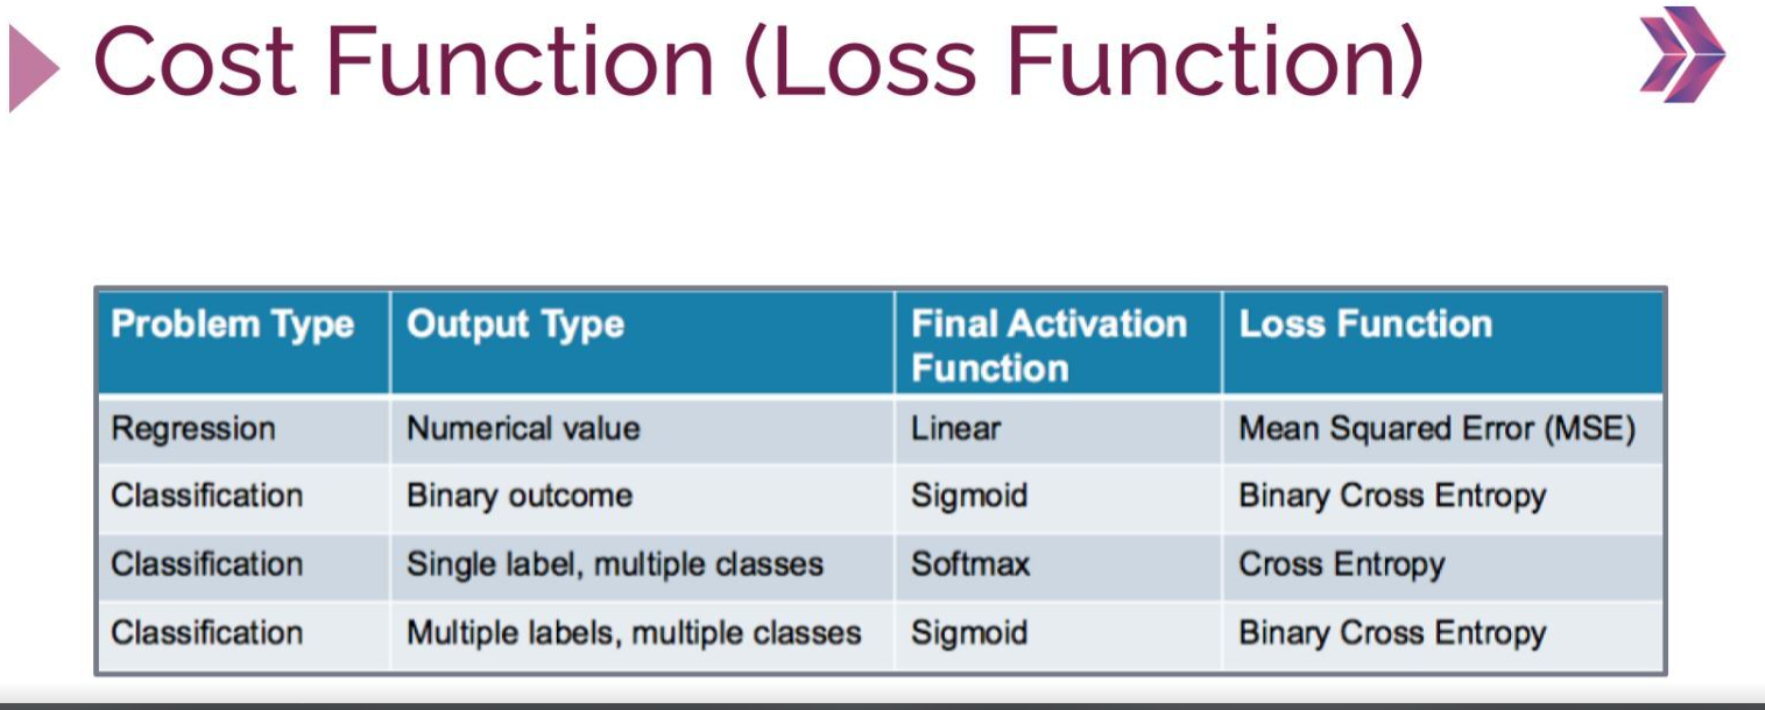

In [65]:
model.compile(optimizer = "rmsprop", loss = "mse")
#adam=lr (learning rate)
#loss=how loss calculated
#optimizer = gradient descent algoritma

In [66]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
#burada modeli egitiyoruz

Epoch 1/250
22/22 [==============================] - 2s 1ms/step - loss: 256660.5469
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256541.5938
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256400.1406
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256229.2500
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256025.9688
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255786.4844
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255508.1094
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255185.1875
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254813.5781
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254387.5625
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253902.8594
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 1042.5276
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1008.2473
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 972.7980
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 939.2604
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 904.7645
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 880.3215
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 854.0797
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 827.3101
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 797.9537
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 770.1600
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 743.2861
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - loss: 712.9786
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 24.7843
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1708
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 24.7378
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2747
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7247
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5198
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5535
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3084
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3155
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2292
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5023
Epoch 206/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3194
Epoch 207/250
22/2

In [47]:
#fit demeke training our model

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.370052  ,  0.64010376,  1.9159701 , -0.2283256 ],
        [ 2.7514677 ,  3.1469963 ,  2.3453622 , -0.9016938 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0.5602152 , 0.55973005, 0.55869704, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.1366873 ,  2.2912045 ,  0.2682026 ,  1.6616431 ],
        [ 1.1254712 ,  2.1172273 , -0.12279302,  1.1533706 ],
        [ 1.47255   ,  1.9801512 , -0.31016472,  1.7971481 ],
        [ 0.7017303 ,  0.7256406 , -0.03474647,  0.05475283]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.17054205,  0.53141594, -0.01663399,  0.5319729 ], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.60170835,  1.7218199 ,  1.9121772 ,  1.1343092 ],
        [-0.02707481,  2.4399383 , 

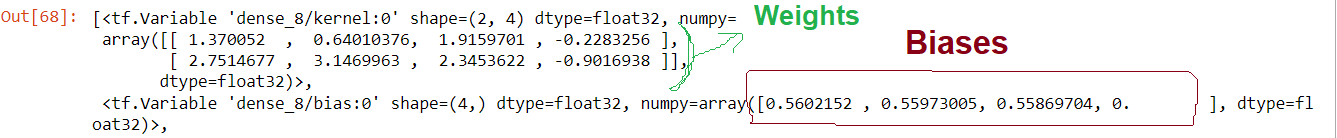

In [70]:
model.history.history

{'loss': [256660.546875,
  256541.59375,
  256400.140625,
  256229.25,
  256025.96875,
  255786.484375,
  255508.109375,
  255185.1875,
  254813.578125,
  254387.5625,
  253902.859375,
  253341.0,
  252697.328125,
  251971.359375,
  251149.9375,
  250223.125,
  249196.796875,
  248046.875,
  246776.234375,
  245374.015625,
  243826.515625,
  242129.84375,
  240276.78125,
  238256.984375,
  236058.515625,
  233684.640625,
  231119.421875,
  228361.875,
  225398.90625,
  222210.875,
  218809.125,
  215192.015625,
  211330.953125,
  207234.421875,
  202905.09375,
  198323.640625,
  193498.328125,
  188435.296875,
  183133.875,
  177595.8125,
  171779.546875,
  165734.796875,
  159471.21875,
  153000.140625,
  146302.28125,
  139373.921875,
  132333.359375,
  125093.0625,
  117677.4375,
  110113.703125,
  102526.84375,
  94835.7890625,
  87106.6953125,
  79408.4296875,
  71760.1875,
  64149.3203125,
  56734.84765625,
  49503.5078125,
  42521.32421875,
  35875.50390625,
  29651.45703125,
  

In [69]:
#history.history bir dic veriyor. herbir epoch icin bir loss degeri.
# bu training loss her bir batch icin
#her bir epoch icin ortalama aliyor

In [71]:
pd.DataFrame(model.history.history)

loss
0   256660.547
1   256541.594
2   256400.141
3   256229.250
4   256025.969
..         ...
245     24.484
246     24.901
247     24.613
248     23.797
249     24.575

[250 rows x 1 columns]

<AxesSubplot:>

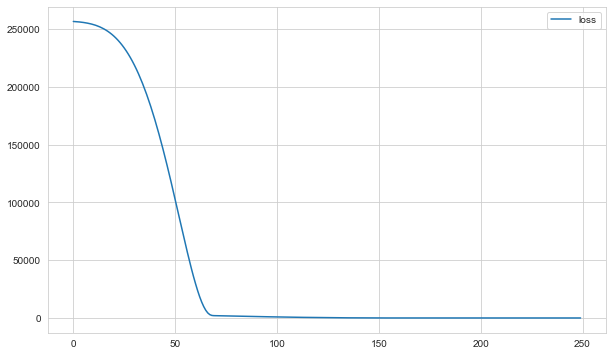

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
#bu dusus exp cunku  rmse aliyoruz 

(0.0, 3000.0)

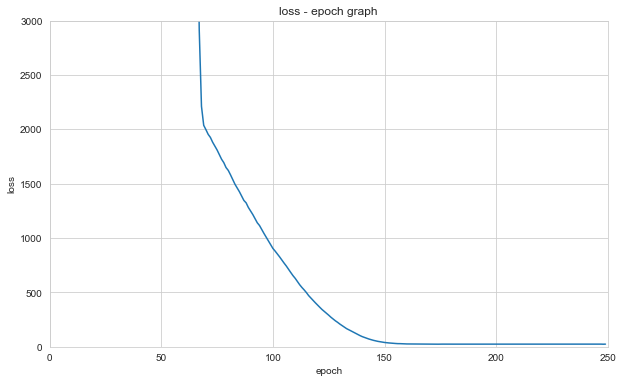

In [74]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

(0.0, 300.0)

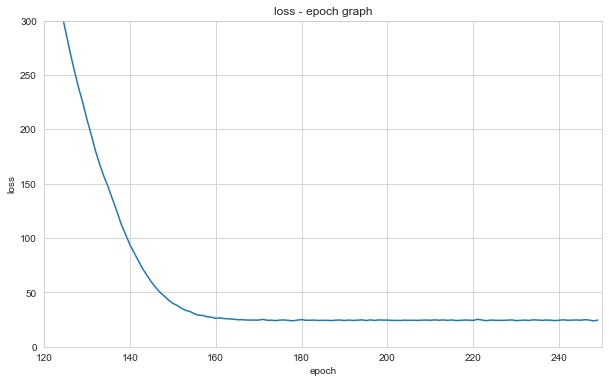

In [80]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([120, 250]) # focusing on the given x values
ax.set_ylim([0, 300]) # focusing on the given y values

## Model Performance

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
model.evaluate(X_train, y_train, verbose=0)
#bu deger son epoch loss ile ayni olmali
#ama floating point precision var. decimallar farkli

24.002784729003906

In [91]:
np.sqrt(24.002784729003906)

4.899263692536247

In [92]:
model.evaluate(X_test, y_test, verbose=0)

25.90521812438965

In [93]:
np.sqrt(25.90521812438965)

5.0897169002204485

In [94]:
np.sqrt(25.90521812438965-24.002784729003906)

1.379287278048247

In [96]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 994us/step


In [97]:
mean_squared_error(y_test, y_pred)

25.90522188656844

In [98]:
#hata olarak ayni seyi hesaplalamamiza ragmen virgulden sonra kucuk farkliliklar var
#25.90521812438965
#25.90522188656844


In [99]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

Actual    Pred
836 258.644 258.802
81  468.357 470.903
110 390.209 393.176
741 523.160 529.332
408 645.708 646.560
924 664.509 670.157
904 627.640 629.347
494 547.073 542.883
3   540.382 537.745
978 667.709 668.558

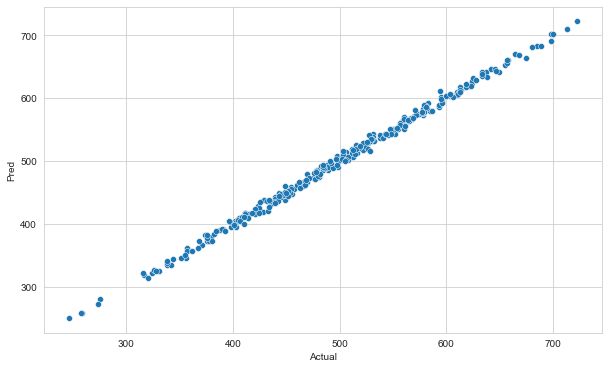

In [101]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)
plt.show()

In [102]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [103]:
eval_metric(y_test, y_pred)

r2_score: 0.9970535568032042 
mae: 4.112501037066974 
mse: 25.90522188656844 
rmse: 5.0897172698066875


## Final Model and Model Deployment

### Final Model Training

In [104]:
scaler = MinMaxScaler().fit(X)

In [105]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [106]:
X_scaled = scaler.transform(X)

In [107]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 965us/step - loss: 257143.0312
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 256856.3750
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 256536.1406
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256175.9062
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 255764.6250
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 255287.7656
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 254745.3125
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 254127.9688
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 253431.2500
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 252648.1719
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 251768.1719
Epoch 12/250
32/32 [==============================] - 0s 1ms/

32/32 [==============================] - 0s 2ms/step - loss: 463.1279
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 431.0152
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 399.5874
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 371.6042
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 345.6369
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 317.4502
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 291.8793
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 270.6678
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 248.4049
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 226.3552
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 206.6024
Epoch 108/250
32/32 [==============================] - 0s 2ms/step - loss: 186.3795
Epoch 10

32/32 [==============================] - 0s 1ms/step - loss: 24.7060
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8293
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4971
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7340
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7259
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6649
Epoch 201/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6859
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9275
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5087
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7923
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9317
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6675
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [108]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [109]:
#final_model.save("model_fake_reg") 

### Loading Model

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model_fake_reg = load_model('model_fake_reg.h5')

In [112]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [113]:
sample = [[998, 1000]]

In [114]:
sample_scaled = scaler_fake_reg.transform(sample)

In [115]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 59ms/step


array([[419.4931]], dtype=float32)

## Prediction-2

In [116]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [117]:
sample = pd.DataFrame(my_dict)
sample

Feature1  Feature2
0       997      1000
1       998       999
2       999       998
3      1000       997
4      1001       996

In [118]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [119]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 19ms/step


array([[379.35184],
       [331.01706],
       [282.65482],
       [234.29256],
       [188.42415]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___